In [78]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import itertools
import paho.mqtt.client as mqtt
from PIL import Image
import pickle
import base64

In [79]:
import time
import paho.mqtt.client as mqtt
import pickle
import json

# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    client.subscribe("model")

    person_pkl = open('./files/COCO/personimages.pkl', 'rb')
    person_matrix = pickle.load(person_pkl)
    client.publish("data", "hello world")
    client.publish("data", "hello world")
    
# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))

def on_publish(client, userdata, result):
    pass

client = mqtt.Client()
client.on_publish = on_publish
client.on_connect = on_connect
client.on_message = on_message

client.connect("localhost", 1883, 65534)

0

In [86]:
# person_pkl = open('./files/COCO/personimages.pkl', 'rb')
persons_data = pickle.load(open('./files/COCO/personimages.pkl', 'rb'))
no_persons_data = pickle.load(open('./files/COCO/nopersonimages.pkl', 'rb'))

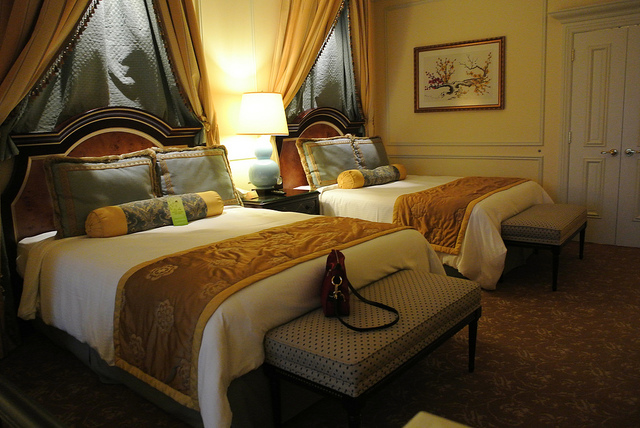

In [92]:
person_images = []
no_person_images = []


for image in persons_data:
    person_images.append(image[0])

for image in no_persons_data:
    no_person_images.append(image[0])

Image.fromarray(no_person_images[0])

In [98]:
import math

packet_size=3000

def publishEncodedImage(image, label):
    encoded = base64.b64encode(image)

    end = packet_size
    start = 0
    length = len(encoded)
    no_of_packets = math.ceil(length/packet_size)

    client.publish("client/pi01", json.dumps({"message": "sending_data", "dimensions": image.shape, "label": label}))

    while start <= len(encoded):
        data = {"message": "chunk", "data": encoded[start:end].decode('utf-8')}
        data_packet = json.dumps(data)

        client.publish("client/pi01", data_packet)

        end += packet_size
        start += packet_size


    client.publish("client/pi01", json.dumps({"message": "done"}))


In [102]:
for i in range(0, 120):
    publishEncodedImage(person_images[i], 1)
    publishEncodedImage(no_person_images[i], 0)

In [89]:
len(no_persons_data)

120